In [1029]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Data Wrangling

In [756]:
arabica_subset = pd.read_csv('arabica_temp_subset.csv').drop(['Unnamed: 0'], axis=1)

In [757]:
arabica_subset.head()

,quality_score,Country of Origin,Aroma,Flavor,Aftertaste,Acidity,Processing Method,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Category Two Defects,Temperature (F)
0,88.83,Brazil,8.58,8.42,8.42,8.50,Natural / Dry,8.25,8.33,10.0,10.0,10.0,8.33,0.11,0,1,77.908733
1,86.92,Brazil,8.50,8.50,8.00,8.00,Natural / Dry,8.00,8.00,10.0,10.0,10.0,7.92,0.12,0,2,77.908733
2,86.42,Brazil,8.50,8.17,8.00,7.75,Natural / Dry,8.00,8.00,10.0,10.0,10.0,8.00,0.12,0,2,77.908733
3,86.17,Brazil,8.17,7.92,7.92,7.75,NaN,8.33,8.00,10.0,10.0,10.0,8.08,0.08,0,2,77.908733
4,86.17,Brazil,8.42,7.92,8.00,7.75,NaN,7.92,8.00,10.0,10.0,10.0,8.17,0.01,0,3,77.908733


In [758]:
arabica_subset.columns

Index(['quality_score', 'Country of Origin', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Processing Method', 'Body', 'Balance', 'Uniformity',
       'Clean Cup', 'Sweetness', 'Cupper Points', 'Moisture',
       'Category One Defects', 'Category Two Defects', 'Temperature (F)'],
      dtype='object')

In [759]:
arabica_sub = arabica_subset[['quality_score', 'Flavor', 'Aroma', 'Processing Method', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean Cup', 'Sweetness', 'Cupper Points', 'Category One Defects', 'Category Two Defects']]

In [760]:
arabica_sub.head()

,quality_score,Flavor,Aroma,Processing Method,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Category One Defects,Category Two Defects
0,88.83,8.42,8.58,Natural / Dry,8.42,8.50,8.25,8.33,10.0,10.0,10.0,8.33,0,1
1,86.92,8.50,8.50,Natural / Dry,8.00,8.00,8.00,8.00,10.0,10.0,10.0,7.92,0,2
2,86.42,8.17,8.50,Natural / Dry,8.00,7.75,8.00,8.00,10.0,10.0,10.0,8.00,0,2
3,86.17,7.92,8.17,NaN,7.92,7.75,8.33,8.00,10.0,10.0,10.0,8.08,0,2
4,86.17,7.92,8.42,NaN,8.00,7.75,7.92,8.00,10.0,10.0,10.0,8.17,0,3


In [761]:
arabica_sub.describe()

,quality_score,Flavor,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Category One Defects,Category Two Defects
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,82.086212,7.516913,7.562614,7.396822,7.532614,7.516570,7.516349,9.825899,9.825625,9.895724,7.496723,0.426067,3.589177
std,3.675542,0.402017,0.380976,0.406202,0.381879,0.361512,0.408316,0.621552,0.817449,0.596925,0.476228,1.831754,5.349249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.170000,7.330000,7.420000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,0.000000,0.000000
50%,82.500000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,0.000000,2.000000
75%,83.670000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,0.000000,4.000000
max,90.580000,8.830000,8.750000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,31.000000,55.000000


In [762]:
# sort values to find outlier
arabica_sub = arabica_sub.sort_values('quality_score').reset_index(drop=True)

In [763]:
# drop outlier
arabica_sub = arabica_sub.drop([0], axis=0)

In [764]:
arabica_sub.columns

Index(['quality_score', 'Flavor', 'Aroma', 'Processing Method', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness',
       'Cupper Points', 'Category One Defects', 'Category Two Defects'],
      dtype='object')

In [765]:
arabica_sub.describe()

,quality_score,Flavor,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Category One Defects,Category Two Defects
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000
mean,82.148825,7.522647,7.568383,7.402464,7.538360,7.522304,7.522082,9.833394,9.83312,9.903272,7.502441,0.426392,3.590389
std,2.893505,0.344348,0.318687,0.351181,0.320307,0.296022,0.351696,0.559343,0.77135,0.530832,0.428989,1.832415,5.351110
min,43.130000,6.000000,5.080000,6.170000,5.250000,5.250000,6.000000,0.000000,0.00000,0.000000,5.170000,0.000000,0.000000
25%,81.170000,7.330000,7.420000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,0.000000,0.000000
50%,82.500000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,0.000000,2.000000
75%,83.670000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,0.000000,4.000000
max,90.580000,8.830000,8.750000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,31.000000,55.000000


In [766]:
arabica_sub['Processing Method'].value_counts()

Washed / Wet                 812
Natural / Dry                251
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: Processing Method, dtype: int64

In [767]:
# clean each value
arabica_sub['Processing Method'] = arabica_sub['Processing Method'].str.replace(' / ', '_')

In [768]:
# see how many NaN values are in the column
arabica_sub['Processing Method'].isnull().value_counts()

False    1159
True      152
Name: Processing Method, dtype: int64

In [769]:
# fill NaN values with Other since they are unknown
arabica_sub['Processing Method'] = arabica_sub['Processing Method'].fillna('Other')

In [770]:
# review value counts again - notice the change from 26 to 178 after the converted NaN values were added
arabica_sub['Processing Method'].value_counts()

Washed_Wet                 812
Natural_Dry                251
Other                      178
Semi-washed_Semi-pulped     56
Pulped natural_honey        14
Name: Processing Method, dtype: int64

In [771]:
# function to scale values
def scale(value):
    return value*10

In [772]:
# scale values to match dependent variable using scale function
arabica_sub['Flavor'] = arabica_sub['Flavor'].apply(lambda v: scale(v))
arabica_sub['Aroma'] = arabica_sub['Aroma'].apply(lambda v: scale(v))
arabica_sub['Cupper Points'] = arabica_sub['Cupper Points'].apply(lambda v: scale(v))
arabica_sub['Aftertaste'] = arabica_sub['Aftertaste'].apply(lambda v: scale(v))
arabica_sub['Acidity'] = arabica_sub['Acidity'].apply(lambda v: scale(v))
arabica_sub['Body'] = arabica_sub['Body'].apply(lambda v: scale(v))
arabica_sub['Balance'] = arabica_sub['Balance'].apply(lambda v: scale(v))
arabica_sub['Uniformity'] = arabica_sub['Uniformity'].apply(lambda v: scale(v))
arabica_sub['Clean Cup'] = arabica_sub['Clean Cup'].apply(lambda v: scale(v))
arabica_sub['Sweetness'] = arabica_sub['Sweetness'].apply(lambda v: scale(v))

In [773]:
arabica_sub.head()

,quality_score,Flavor,Aroma,Processing Method,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Category One Defects,Category Two Defects
1,43.13,60.0,60.0,Other,62.5,68.8,60.0,60.0,0.0,0.0,0.0,60.0,0,0
2,59.83,66.7,75.0,Washed_Wet,66.7,76.7,73.3,66.7,80.0,13.3,13.3,66.7,0,4
3,63.08,65.8,72.5,Other,63.3,62.5,64.2,60.8,60.0,60.0,60.0,61.7,1,5
4,67.92,65.8,67.5,Natural_Dry,64.2,66.7,70.8,66.7,93.3,60.0,60.0,64.2,8,16
5,68.33,68.3,70.8,Washed_Wet,62.5,74.2,72.5,67.5,100.0,0.0,100.0,67.5,0,20


## Creating Training and Testing Samples

In [854]:
# create training sample
train_amt = int(0.90*len(arabica_sub))
train_df = arabica_sub.sample(train_amt)

In [856]:
# create testing sample
test_amt = len(arabica_sub) - train_amt
test_df = arabica_sub.sample(test_amt)

In [978]:
# fix column name to reflect the train data column name
test_df.rename(columns={'Category One Defects': 'Category_One_Defects', 'Category Two Defects': 'Category_Two_Defects'}, inplace=True)

## Correlation Analysis

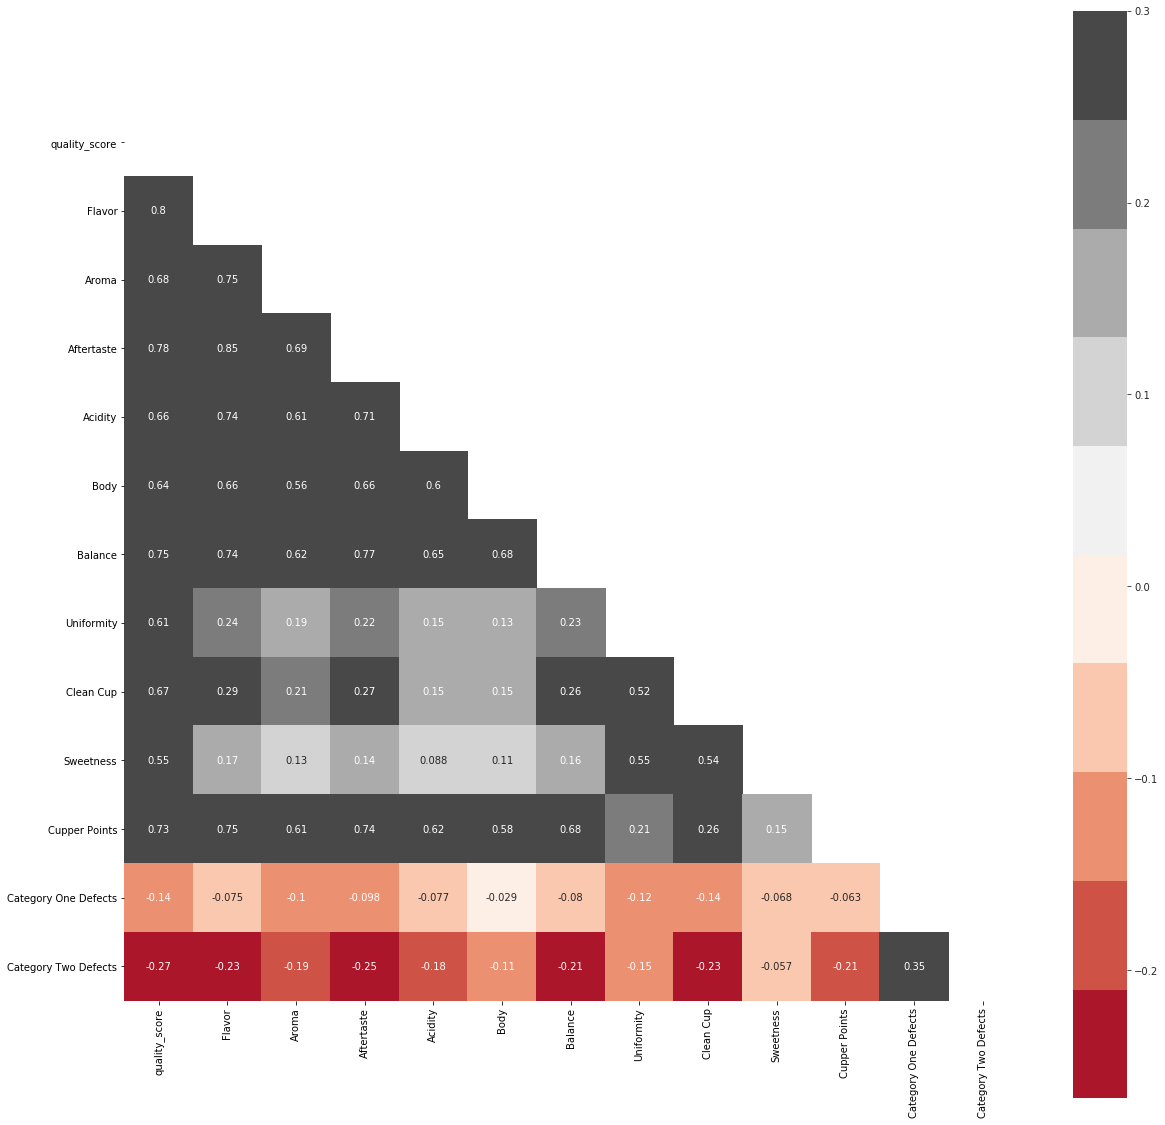

In [858]:
# graph correlation matrix to see what pairs are correlated and how much they are correlated
plt.subplots(figsize=(20, 20))
cmap = sns.color_palette("RdGy", 10)
mask = np.zeros_like(train_df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(train_df.corr(), mask=mask, cmap=cmap, vmax=0.3, square=True, annot=True)
plt.show()

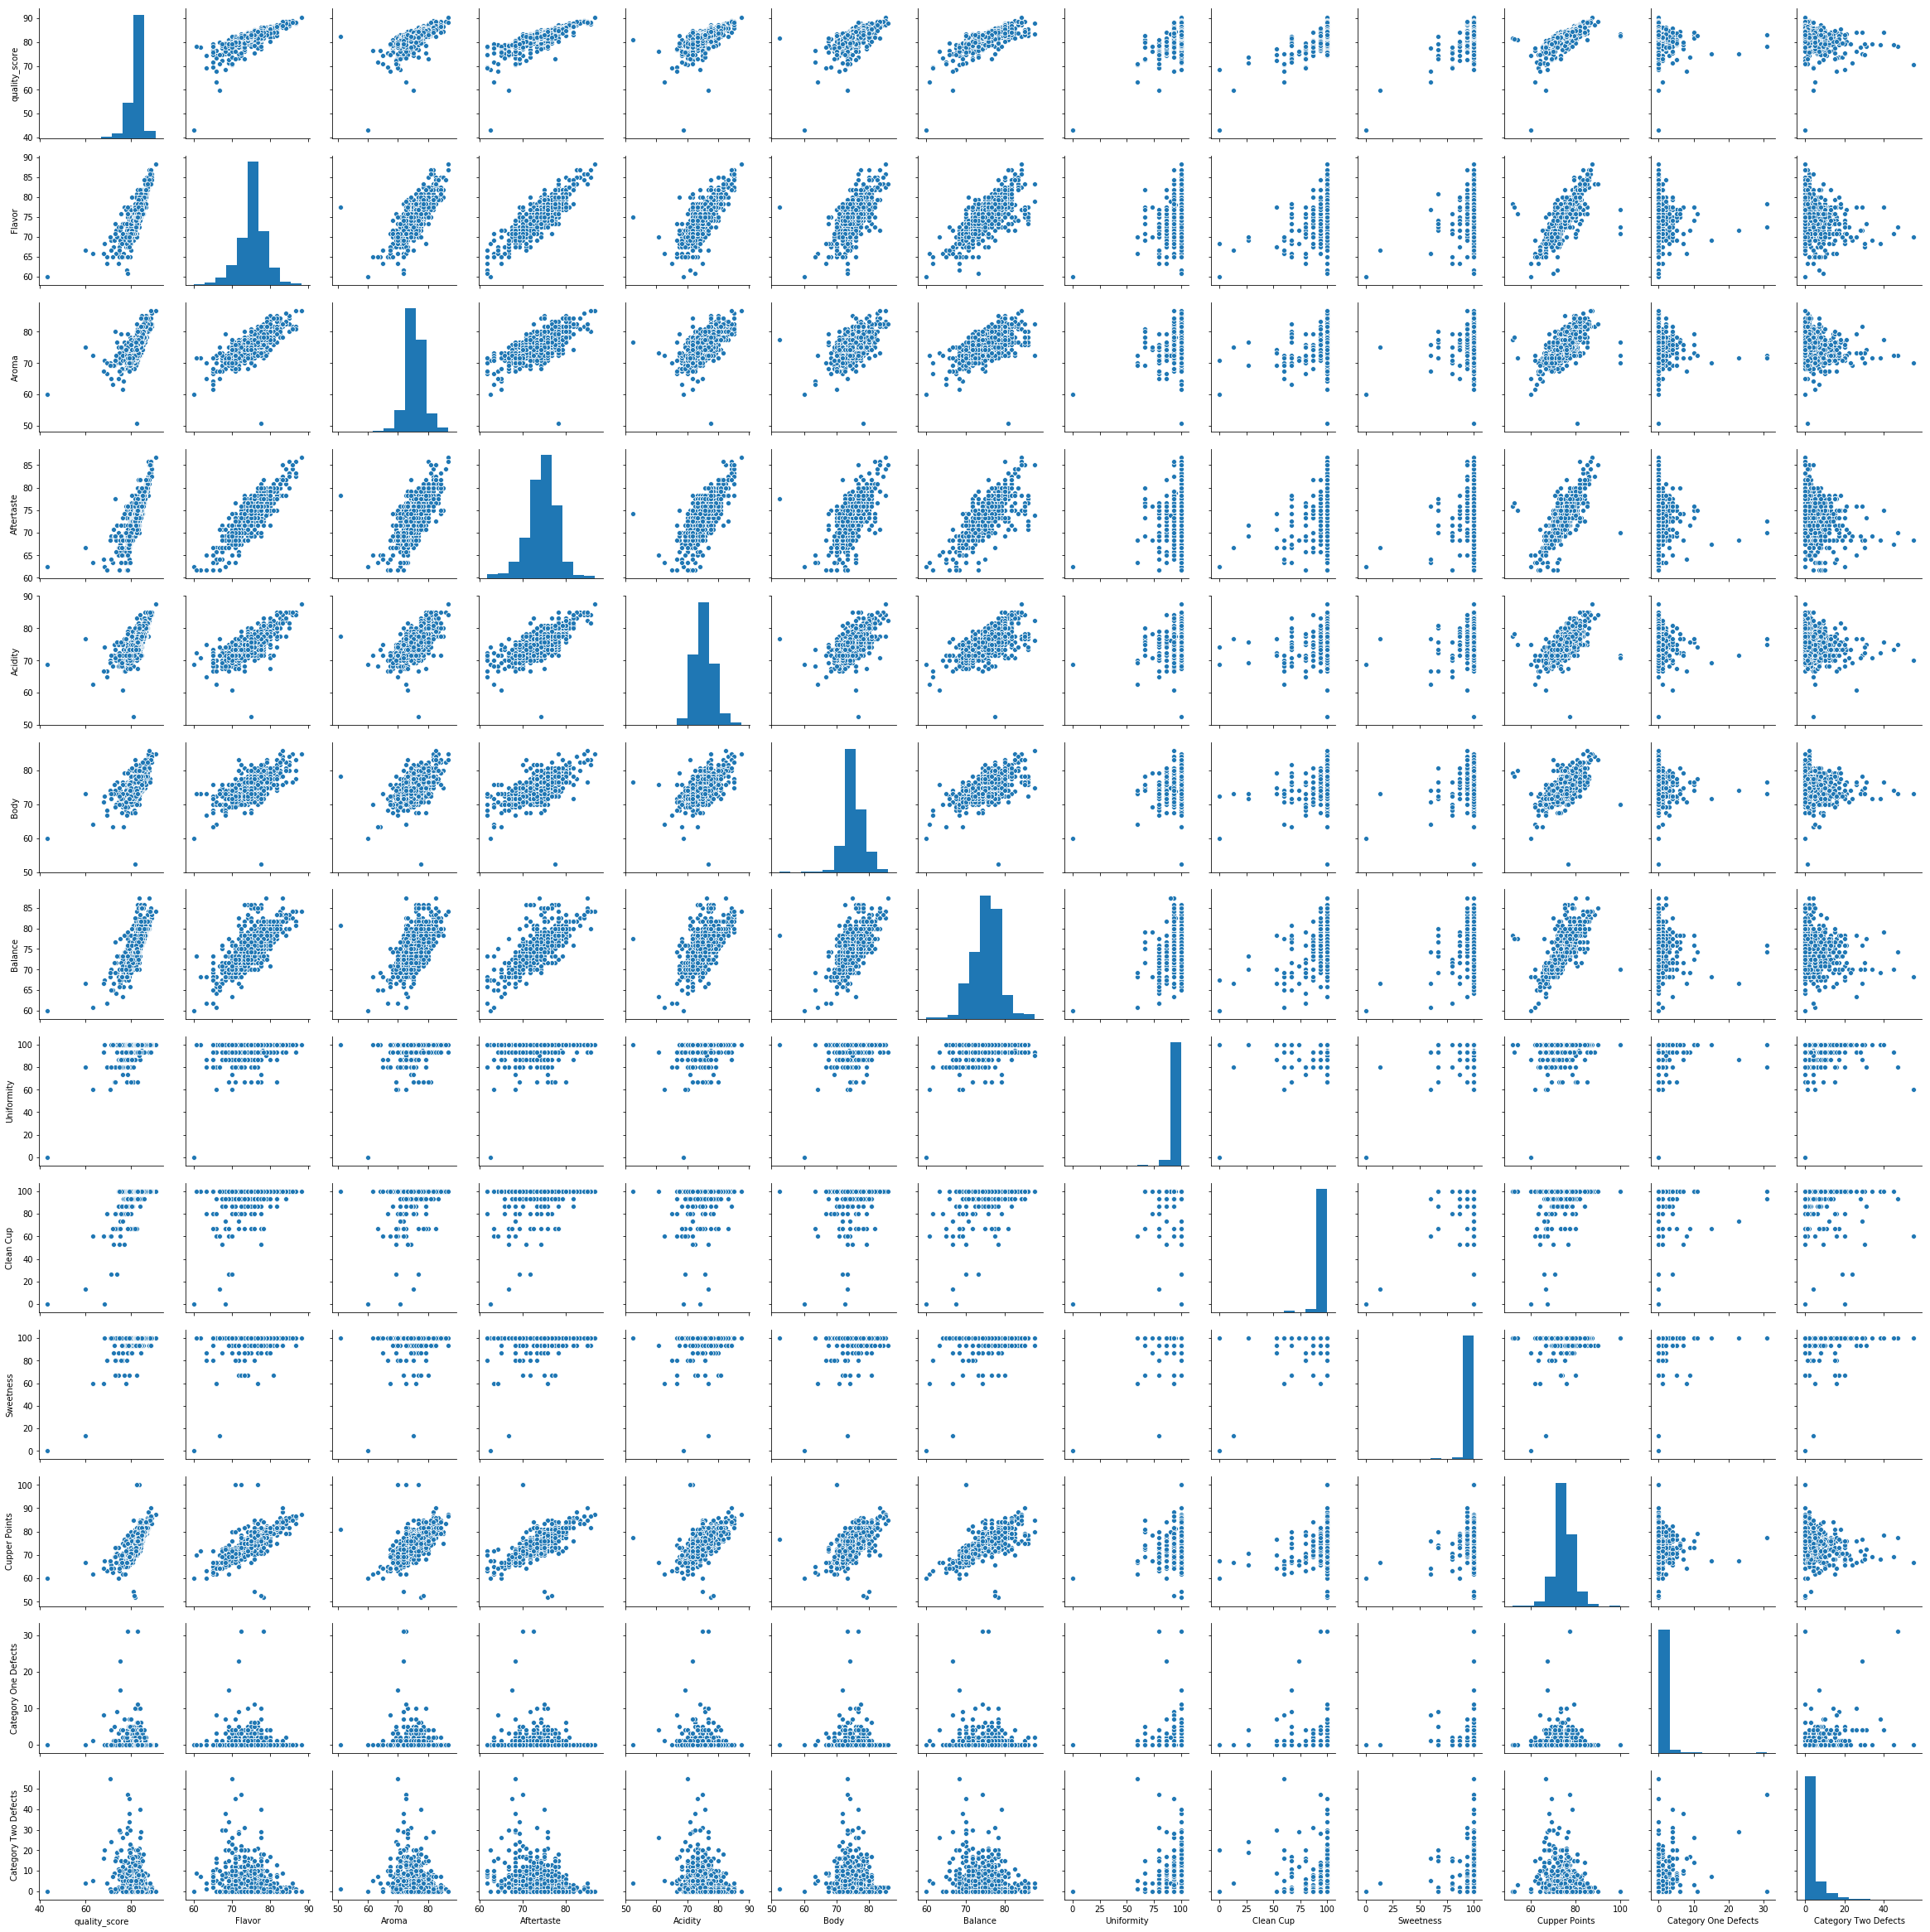

In [859]:
# looking at the relationship between pairs
sns.pairplot(train_df)

## Dummy Variables

In [980]:
defects1_dummy = pd.get_dummies(train_df['Category One Defects'], prefix='Category_One_Defects')

In [861]:
defects1_dummies = pd.concat([train_df, defects1_dummy], axis = 1)

In [981]:
defects2_dummy = pd.get_dummies(train_df['Category Two Defects'], prefix='Category_Two_Defects')

In [863]:
defects2_dummies = pd.concat([defects1_dummies, defects2_dummy], axis = 1)

In [864]:
processing_dummy = pd.get_dummies(train_df['Processing Method'], prefix='Processing')

In [865]:
processing_dummies = pd.concat([defects2_dummies, processing_dummy], axis = 1)

In [866]:
processing_dummies.columns

Index(['quality_score', 'Flavor', 'Aroma', 'Processing Method', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness',
       'Cupper Points', 'Category One Defects', 'Category Two Defects',
       'Category_One_Defects_0', 'Category_One_Defects_1',
       'Category_One_Defects_2', 'Category_One_Defects_3',
       'Category_One_Defects_4', 'Category_One_Defects_5',
       'Category_One_Defects_6', 'Category_One_Defects_7',
       'Category_One_Defects_8', 'Category_One_Defects_9',
       'Category_One_Defects_10', 'Category_One_Defects_11',
       'Category_One_Defects_15', 'Category_One_Defects_23',
       'Category_One_Defects_31', 'Category_Two_Defects_0',
       'Category_Two_Defects_1', 'Category_Two_Defects_2',
       'Category_Two_Defects_3', 'Category_Two_Defects_4',
       'Category_Two_Defects_5', 'Category_Two_Defects_6',
       'Category_Two_Defects_7', 'Category_Two_Defects_8',
       'Category_Two_Defects_9', 'Category_Two_Defects_10',


In [867]:
processing_dummies['Processing_Pulped_natural_honey'] = processing_dummies['Processing_Pulped natural_honey']

In [868]:
processing_dummies['Processing_Semiwashed_Semipulped'] = processing_dummies['Processing_Semi-washed_Semi-pulped']

In [869]:
processing_dummies = processing_dummies.drop(['Processing_Pulped natural_honey', 'Processing_Semi-washed_Semi-pulped'], axis=1)

In [870]:
processing_dummies['Clean_Cup'] = processing_dummies['Clean Cup']

In [871]:
processing_dummies = processing_dummies.drop(['Clean Cup'], axis=1)

### Interaction Variables

In [872]:
processing_dummies.head()

,quality_score,Flavor,Aroma,Processing Method,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,...,Category_Two_Defects_40,Category_Two_Defects_45,Category_Two_Defects_47,Category_Two_Defects_55,Processing_Natural_Dry,Processing_Other,Processing_Washed_Wet,Processing_Pulped_natural_honey,Processing_Semiwashed_Semipulped,Clean_Cup
923,83.42,77.5,74.2,Natural_Dry,76.7,75.8,76.7,76.7,100.0,100.0,...,0,0,0,0,1,0,0,0,0,100.0
520,82.08,74.2,75.0,Washed_Wet,74.2,75.0,72.5,75.0,100.0,100.0,...,0,0,0,0,0,0,1,0,0,100.0
60,77.50,67.5,71.7,Washed_Wet,65.8,67.5,68.3,67.5,100.0,100.0,...,0,0,0,0,0,0,1,0,0,100.0
1107,84.25,79.2,73.3,Natural_Dry,79.2,79.2,79.2,80.8,100.0,93.3,...,0,0,0,0,1,0,0,0,0,100.0
911,83.33,75.8,77.5,Semi-washed_Semi-pulped,76.7,75.8,75.8,75.8,100.0,100.0,...,0,0,0,0,0,0,0,0,1,100.0


In [873]:
processing_dummies['AromaxFlavor'] = processing_dummies['Aroma']*processing_dummies['Flavor']

In [874]:
processing_dummies['AromaxCupper'] = processing_dummies['Aroma']*processing_dummies['Cupper Points']

In [875]:
processing_dummies['FlavorxCupper'] = processing_dummies['Flavor']*processing_dummies['Cupper Points']

In [876]:
processing_dummies['FlavorxAftertaste'] = processing_dummies['Flavor']*processing_dummies['Aftertaste']

## Creating a Model

In [877]:
# copy dataframe to a separate variable
coffee_df = processing_dummies.copy()

In [878]:
# make a new column for Cupper Points so there is no space between the words in the column title
coffee_df['Cupper_Points'] = coffee_df['Cupper Points']

In [879]:
# drop the Cupper Points column
coffee_df= coffee_df.drop(['Cupper Points'], axis=1)

In [880]:
coffee_df.head()

,quality_score,Flavor,Aroma,Processing Method,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,...,Processing_Other,Processing_Washed_Wet,Processing_Pulped_natural_honey,Processing_Semiwashed_Semipulped,Clean_Cup,AromaxFlavor,AromaxCupper,FlavorxCupper,FlavorxAftertaste,Cupper_Points
923,83.42,77.5,74.2,Natural_Dry,76.7,75.8,76.7,76.7,100.0,100.0,...,0,0,0,0,100.0,5750.50,5691.14,5944.25,5944.25,76.7
520,82.08,74.2,75.0,Washed_Wet,74.2,75.0,72.5,75.0,100.0,100.0,...,0,1,0,0,100.0,5565.00,5625.00,5565.00,5505.64,75.0
60,77.50,67.5,71.7,Washed_Wet,65.8,67.5,68.3,67.5,100.0,100.0,...,0,1,0,0,100.0,4839.75,4782.39,4502.25,4441.50,66.7
1107,84.25,79.2,73.3,Natural_Dry,79.2,79.2,79.2,80.8,100.0,93.3,...,0,0,0,0,100.0,5805.36,5739.39,6201.36,6272.64,78.3
911,83.33,75.8,77.5,Semi-washed_Semi-pulped,76.7,75.8,75.8,75.8,100.0,100.0,...,0,0,0,1,100.0,5874.50,5874.50,5745.64,5813.86,75.8


### Quality Score ~ Aroma

In [881]:
# set up the formula
aroma1 = "quality_score~Aroma"

In [882]:
# set up the model using StatsModel
aroma_model = ols(formula=aroma1, data=coffee_df).fit()

In [883]:
aroma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     1032.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          3.87e-163
Time:                        00:21:02   Log-Likelihood:                -2566.9
No. Observations:                1179   AIC:                             5138.
Df Residuals:                    1177   BIC:                             5148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.7043      1.478     23.476      0.000      31.804      37.605
Aroma          0.6271      0.020     32.130      0.000       0.589       0.665
==============================================================================
Omnibus:                     1134.946   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110041.884
Skew:                          -4.157   Prob(JB):                         0.00
Kurtosis:                      49.593   Cond. No.                     1.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Quality Score ~ Aroma + Flavor

In [884]:
# copy columns of interest into a separate dataframe
aroma_flavor = coffee_df[['quality_score', 'Aroma', 'Flavor', 'AromaxFlavor']].copy()

In [885]:
# set up the formula
aromaflavor = "quality_score~Aroma+Flavor"

In [886]:
# set up the model using StatsModel
aromaflavor_model = ols(formula=aromaflavor, data=coffee_df).fit()

In [887]:
aromaflavor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1153.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          6.11e-278
Time:                        00:21:07   Log-Likelihood:                -2298.2
No. Observations:                1179   AIC:                             4602.
Df Residuals:                    1176   BIC:                             4618.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.4963      1.219     21.738      0.000      24.105      28.888
Aroma          0.1710      0.023      7.308      0.000       0.125       0.217
Flavor         0.5675      0.022     26.061      0.000       0.525       0.610
==============================================================================
Omnibus:                     1430.175   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274895.126
Skew:                          -5.996   Prob(JB):                         0.00
Kurtosis:                      76.838   Cond. No.                     2.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [888]:
# set up the formula
aromaxflavor = "quality_score~Aroma+Flavor+AromaxFlavor"

In [889]:
# set up the model using StatsModel
aromaxflavor_model = ols(formula=aromaxflavor, data=coffee_df).fit()

In [890]:
aromaxflavor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     879.8
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          8.19e-300
Time:                        00:21:11   Log-Likelihood:                -2244.0
No. Observations:                1179   AIC:                             4496.
Df Residuals:                    1175   BIC:                             4516.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -131.3065     14.878     -8.826      0.000    -160.497    -102.116
Aroma            2.2791      0.199     11.430      0.000       1.888       2.670
Flavor           2.6635      0.198     13.445      0.000       2.275       3.052
AromaxFlavor    -0.0280      0.003    -10.639      0.000      -0.033      -0.023
==============================================================================
Omnibus:                     1149.995   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96919.488
Skew:                          -4.313   Prob(JB):                         0.00
Kurtosis:                      46.572   Cond. No.                     1.80e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Quality Score ~ Aroma + Cupper Points

In [891]:
# set up the formula
aromacupper = "quality_score~Aroma+Cupper_Points"

In [892]:
# set up the model using StatsModel
aromacupper_model = ols(formula=aromacupper, data=coffee_df).fit()

In [893]:
aromacupper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     985.8
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          3.94e-252
Time:                        00:21:14   Log-Likelihood:                -2357.8
No. Observations:                1179   AIC:                             4722.
Df Residuals:                    1176   BIC:                             4737.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        30.0634      1.256     23.940      0.000      27.600      32.527
Aroma             0.3429      0.021     16.562      0.000       0.302       0.384
Cupper_Points     0.3484      0.016     22.379      0.000       0.318       0.379
==============================================================================
Omnibus:                     1410.043   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           253166.135
Skew:                          -5.866   Prob(JB):                         0.00
Kurtosis:                      73.823   Cond. No.                     2.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [894]:
# set up the formula
aromaxcupper = aromacupper = "quality_score~Aroma+Cupper_Points+AromaxCupper"

In [895]:
# set up the model using StatsModel
aromaxcupper_model = ols(formula=aromaxcupper, data=coffee_df).fit()

In [896]:
aromaxcupper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     730.4
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          6.18e-268
Time:                        00:21:17   Log-Likelihood:                -2317.7
No. Observations:                1179   AIC:                             4643.
Df Residuals:                    1175   BIC:                             4664.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -94.4895     13.747     -6.874      0.000    -121.461     -67.519
Aroma             2.0131      0.185     10.899      0.000       1.651       2.375
Cupper_Points     2.0013      0.182     10.976      0.000       1.644       2.359
AromaxCupper     -0.0221      0.002     -9.096      0.000      -0.027      -0.017
==============================================================================
Omnibus:                     1236.699   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125073.738
Skew:                          -4.825   Prob(JB):                         0.00
Kurtosis:                      52.527   Cond. No.                     1.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Quality Score ~ Flavor + Cupper Points

In [897]:
# set up the formula
flavorcupper = "quality_score~Flavor+Cupper_Points"

In [898]:
# set up the model using StatsModel
flavorcupper_model = ols(formula=flavorcupper, data=coffee_df).fit()

In [899]:
flavorcupper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1288.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          5.53e-297
Time:                        00:21:20   Log-Likelihood:                -2254.2
No. Observations:                1179   AIC:                             4514.
Df Residuals:                    1176   BIC:                             4530.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.3893      1.054     27.890      0.000      27.322      31.457
Flavor            0.4945      0.021     23.511      0.000       0.453       0.536
Cupper_Points     0.2072      0.017     12.190      0.000       0.174       0.241
==============================================================================
Omnibus:                     1527.521   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           396038.290
Skew:                          -6.670   Prob(JB):                         0.00
Kurtosis:                      91.791   Cond. No.                     2.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [900]:
# set up the formula
flavorxcupper = "quality_score~Flavor+Cupper_Points+FlavorxCupper"

In [901]:
# set up the model using StatsModel
flavorxcupper_model = ols(formula=flavorxcupper, data=coffee_df).fit()

In [902]:
flavorxcupper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1015.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:21:24   Log-Likelihood:                -2184.5
No. Observations:                1179   AIC:                             4377.
Df Residuals:                    1175   BIC:                             4397.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -104.4443     11.063     -9.441      0.000    -126.150     -82.738
Flavor            2.2860      0.149     15.360      0.000       1.994       2.578
Cupper_Points     2.0073      0.149     13.466      0.000       1.715       2.300
FlavorxCupper    -0.0240      0.002    -12.146      0.000      -0.028      -0.020
==============================================================================
Omnibus:                     1268.391   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           162600.240
Skew:                          -4.947   Prob(JB):                         0.00
Kurtosis:                      59.675   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Quality Score ~ Aroma + Flavor + Cupper Points

In [903]:
# set up the formula
aromaflavorcupper = "quality_score~Aroma+Flavor+AromaxFlavor+Cupper_Points+AromaxCupper+FlavorxCupper"

In [904]:
# set up the model using StatsModel
aromaflavorcupper_model = ols(formula=aromaflavorcupper, data=coffee_df).fit()

In [905]:
aromaflavorcupper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     537.3
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:21:28   Log-Likelihood:                -2158.9
No. Observations:                1179   AIC:                             4332.
Df Residuals:                    1172   BIC:                             4367.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -116.9860     13.962     -8.379      0.000    -144.379     -89.593
Aroma             0.1137      0.384      0.296      0.767      -0.640       0.868
Flavor            3.3613      0.434      7.739      0.000       2.509       4.213
AromaxFlavor     -0.0135      0.005     -2.466      0.014      -0.024      -0.003
Cupper_Points     1.1081      0.356      3.110      0.002       0.409       1.807
AromaxCupper      0.0138      0.005      2.604      0.009       0.003       0.024
FlavorxCupper    -0.0260      0.004     -6.160      0.000      -0.034      -0.018
==============================================================================
Omnibus:                     1263.610   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154722.900
Skew:                          -4.932   Prob(JB):                         0.00
Kurtosis:                      58.247   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Quality Score ~ Aroma + Flavor + Cupper Points + All Dummy Variables

In [951]:
# copy columns of interest into a separate dataframe
dummy_vars = processing_dummies.copy().drop(['quality_score', 'Processing Method',
       'Cupper Points', 'Category One Defects', 'Category Two Defects',
       'Category_One_Defects_0', 'Category_Two_Defects_55', 'Processing_Other'], axis=1).columns.tolist()

In [952]:
dummy_vars = [x.replace(' ', '_') for x in dummy_vars]

In [953]:
# join each element of the list with a + for the formula
dummy_vars = '+'.join(dummy_vars)

In [954]:
dummy_vars

'Flavor+Aroma+Aftertaste+Acidity+Body+Balance+Uniformity+Sweetness+Category_One_Defects_1+Category_One_Defects_2+Category_One_Defects_3+Category_One_Defects_4+Category_One_Defects_5+Category_One_Defects_6+Category_One_Defects_7+Category_One_Defects_8+Category_One_Defects_9+Category_One_Defects_10+Category_One_Defects_11+Category_One_Defects_15+Category_One_Defects_23+Category_One_Defects_31+Category_Two_Defects_0+Category_Two_Defects_1+Category_Two_Defects_2+Category_Two_Defects_3+Category_Two_Defects_4+Category_Two_Defects_5+Category_Two_Defects_6+Category_Two_Defects_7+Category_Two_Defects_8+Category_Two_Defects_9+Category_Two_Defects_10+Category_Two_Defects_11+Category_Two_Defects_12+Category_Two_Defects_13+Category_Two_Defects_14+Category_Two_Defects_15+Category_Two_Defects_16+Category_Two_Defects_17+Category_Two_Defects_18+Category_Two_Defects_19+Category_Two_Defects_20+Category_Two_Defects_21+Category_Two_Defects_22+Category_Two_Defects_23+Category_Two_Defects_24+Category_Two_Def

In [955]:
# set up the formula
dum_form = "quality_score~{}".format(dummy_vars)

In [956]:
# set up the model using StatsModel
dummy_model = ols(formula=dum_form, data=processing_dummies).fit()

In [957]:
dummy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.003e+05
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:29:02   Log-Likelihood:                 3331.2
No. Observations:                1179   AIC:                            -6528.
Df Residuals:                    1112   BIC:                            -6189.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.3845      0.149     -2.588      0.010      -0.676      -0.093
Flavor                               0.1492      0.005     32.561      0.000       0.140       0.158
Aroma                                0.1271      0.004     33.457      0.000       0.120       0.135
Aftertaste                           0.1331      0.004     32.312      0.000       0.125       0.141
Acidity                              0.0999      0.000    451.384      0.000       0.099       0.100
Body                                 0.1001      0.000    450.824      0.000       0.100       0.100
Balance                              0.1004      0.000    452.387      0.000       0.100       0.101
Uniformity                           0.1000      0.000    955.777      0.000       0.100       0.100
Sweetness                            0.1000      0.000    895.549      0.000       0.100       0.100
Category_One_Defects_1              -0.0044      0.002     -2.655      0.008      -0.008      -0.001
Category_One_Defects_2              -0.0031      0.003     -1.159      0.247      -0.008       0.002
Category_One_Defects_3              -0.0063      0.004     -1.663      0.097      -0.014       0.001
Category_One_Defects_4              -0.0039      0.005     -0.749      0.454      -0.014       0.006
Category_One_Defects_5              -0.0031      0.005     -0.591      0.555      -0.013       0.007
Category_One_Defects_6              -0.0002      0.009     -0.027      0.979      -0.017       0.017
Category_One_Defects_7              -0.0044      0.011     -0.401      0.688      -0.026       0.017
Category_One_Defects_8              -0.0110      0.017     -0.651      0.515      -0.044       0.022
Category_One_Defects_9               0.0003      0.016      0.017      0.986      -0.032       0.033
Category_One_Defects_10              0.0086      0.010      0.887      0.375      -0.010       0.028
Category_One_Defects_11             -0.0101      0.015     -0.678      0.498      -0.039       0.019
Category_One_Defects_15             -0.0156      0.015     -1.024      0.306      -0.046       0.014
Category_One_Defects_23             -0.0259      0.022     -1.196      0.232      -0.068       0.017
Category_One_Defects_31             -0.0147      0.015     -0.982      0.326      -0.044       0.015
Category_Two_Defects_0               0.0002      0.015      0.016      0.987      -0.030       0.031
Category_Two_Defects_1               0.0002      0.015      0.013      0.990      -0.030       0.031
Category_Two_Defects_2               0.0003      0.015      0.019      0.985      -0.030       0.031
Category_Two_Defects_3              -0.0008      0.015     -0.049      0.961      -0.031       0.030
Category_Two_Defects_4              -0.0024      0.01

In [913]:
coffee_df.rename(columns={'Category One Defects': 'Category_One_Defects', 'Category Two Defects': 'Category_Two_Defects'}, inplace=True)

In [1122]:
coffee_df.columns

Index(['quality_score', 'Flavor', 'Aroma', 'Processing Method', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Sweetness',
       'Category_One_Defects', 'Category_Two_Defects',
       'Category_One_Defects_0', 'Category_One_Defects_1',
       'Category_One_Defects_2', 'Category_One_Defects_3',
       'Category_One_Defects_4', 'Category_One_Defects_5',
       'Category_One_Defects_6', 'Category_One_Defects_7',
       'Category_One_Defects_8', 'Category_One_Defects_9',
       'Category_One_Defects_10', 'Category_One_Defects_11',
       'Category_One_Defects_15', 'Category_One_Defects_23',
       'Category_One_Defects_31', 'Category_Two_Defects_0',
       'Category_Two_Defects_1', 'Category_Two_Defects_2',
       'Category_Two_Defects_3', 'Category_Two_Defects_4',
       'Category_Two_Defects_5', 'Category_Two_Defects_6',
       'Category_Two_Defects_7', 'Category_Two_Defects_8',
       'Category_Two_Defects_9', 'Category_Two_Defects_10',
       'Category_Two_Defects_1

### Final Linear Regression Model

In [965]:
# copy columns of interest into a separate dataframe
dummy_vars1 = processing_dummies.copy().drop(['quality_score', 'Processing Method',
       'Cupper Points', 'Category One Defects', 'Category Two Defects',
       'Category_One_Defects_0', 'Category_Two_Defects_55', 'Processing_Other', 'Category_One_Defects_2', 'Category_One_Defects_3',
       'Category_One_Defects_4', 'Category_One_Defects_5',
       'Category_One_Defects_6', 'Category_One_Defects_7',
       'Category_One_Defects_8', 'Category_One_Defects_9',
       'Category_One_Defects_10', 'Category_One_Defects_11',
       'Category_One_Defects_15', 'Category_One_Defects_23',
       'Category_One_Defects_31', 'Category_Two_Defects_0',
       'Category_Two_Defects_1', 'Category_Two_Defects_2',
       'Category_Two_Defects_3', 'Category_Two_Defects_4',
       'Category_Two_Defects_5', 'Category_Two_Defects_6',
       'Category_Two_Defects_7', 'Category_Two_Defects_8',
       'Category_Two_Defects_9', 'Category_Two_Defects_10',
       'Category_Two_Defects_11', 'Category_Two_Defects_12',
       'Category_Two_Defects_13', 'Category_Two_Defects_14',
       'Category_Two_Defects_15', 'Category_Two_Defects_16',
       'Category_Two_Defects_17', 'Category_Two_Defects_18',
       'Category_Two_Defects_19', 'Category_Two_Defects_20',
       'Category_Two_Defects_21', 'Category_Two_Defects_22',
       'Category_Two_Defects_23', 'Category_Two_Defects_24',
       'Category_Two_Defects_26', 'Category_Two_Defects_28',
       'Category_Two_Defects_29', 'Category_Two_Defects_30',
       'Category_Two_Defects_31', 'Category_Two_Defects_34',
       'Category_Two_Defects_38', 'Category_Two_Defects_40',
       'Category_Two_Defects_45', 'Processing_Natural_Dry', 'Processing_Pulped_natural_honey',
       'Processing_Semiwashed_Semipulped', 'Processing_Washed_Wet'], axis=1).columns.tolist()

In [966]:
dummy_vars1

['Flavor',
 'Aroma',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Sweetness',
 'Category_One_Defects_1',
 'Category_Two_Defects_47',
 'Clean_Cup',
 'AromaxFlavor',
 'AromaxCupper',
 'FlavorxCupper',
 'FlavorxAftertaste']

In [967]:
# dummy_vars1 = [x.replace(' ', '_') for x in dummy_vars1]

In [968]:
# join each element of the list with a + for the formula
dummy_vars1 = '+'.join(dummy_vars1)

In [969]:
dummy_vars1

'Flavor+Aroma+Aftertaste+Acidity+Body+Balance+Uniformity+Sweetness+Category_One_Defects_1+Category_Two_Defects_47+Clean_Cup+AromaxFlavor+AromaxCupper+FlavorxCupper+FlavorxAftertaste'

In [970]:
# set up the formula
dum_form1 = "quality_score~{}".format(dummy_vars1)

In [971]:
# set up the model using StatsModel
dummy_model1 = ols(formula=dum_form1, data=processing_dummies).fit()

In [972]:
dummy_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.114e+06
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:31:34   Log-Likelihood:                 3311.0
No. Observations:                1179   AIC:                            -6590.
Df Residuals:                    1163   BIC:                            -6509.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.3427      0.143     -2.390      0.017      -0.624      -0.061
Flavor                      0.1494      0.004     33.347      0.000       0.141       0.158
Aroma                       0.1263      0.004     34.097      0.000       0.119       0.134
Aftertaste                  0.1325      0.004     32.971      0.000       0.125       0.140
Acidity                     0.0999      0.000    467.056      0.000       0.099       0.100
Body                        0.1001      0.000    465.582      0.000       0.100       0.100
Balance                     0.1005      0.000    466.059      0.000       0.100       0.101
Uniformity                  0.1000   9.66e-05   1035.818      0.000       0.100       0.100
Sweetness                   0.1000      0.000    983.397      0.000       0.100       0.100
Category_One_Defects_1     -0.0034      0.002     -2.148      0.032      -0.007      -0.000
Category_Two_Defects_47    -0.4798      0.015    -32.312      0.000      -0.509      -0.451
Clean_Cup                   0.1002   6.96e-05   1439.394      0.000       0.100       0.100
AromaxFlavor               -0.0010   5.65e-05    -16.896      0.000      -0.001      -0.001
AromaxCupper                0.0006   5.51e-05     11.023      0.000       0.000       0.001
FlavorxCupper               0.0007    5.5e-05     13.186      0.000       0.001       0.001
FlavorxAftertaste          -0.0004   5.36e-05     -8.131      0.000      -0.001      -0.000
==============================================================================
Omnibus:                      883.810   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43427.937
Skew:                           2.944   Prob(JB):                         0.00
Kurtosis:                      32.144   Cond. No.                     3.81e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1198]:
# copy columns of interest into a separate dataframe
dummy_vars2 = coffee_df.copy().drop(['quality_score', 'Processing Method',
         'Category_One_Defects', 'Category_Two_Defects',
        'Category_Two_Defects_55', 'Processing_Other', 'Category_One_Defects_2', 'Category_One_Defects_3',
       'Category_One_Defects_4', 'Category_One_Defects_5',
       'Category_One_Defects_6', 'Category_One_Defects_7',
       'Category_One_Defects_8', 'Category_One_Defects_9',
       'Category_One_Defects_10', 'Category_One_Defects_11',
       'Category_One_Defects_15', 'Category_One_Defects_23',
       'Category_One_Defects_31', 'Category_Two_Defects_0',
       'Category_Two_Defects_1', 'Category_Two_Defects_2',
       'Category_Two_Defects_3', 'Category_Two_Defects_4',
       'Category_Two_Defects_5', 'Category_Two_Defects_6',
       'Category_Two_Defects_7', 'Category_Two_Defects_8',
       'Category_Two_Defects_9', 'Category_Two_Defects_10',
       'Category_Two_Defects_11', 'Category_Two_Defects_12',
       'Category_Two_Defects_13', 'Category_Two_Defects_14',
       'Category_Two_Defects_15', 'Category_Two_Defects_16',
       'Category_Two_Defects_17', 'Category_Two_Defects_18',
       'Category_Two_Defects_19', 'Category_Two_Defects_20',
       'Category_Two_Defects_21', 'Category_Two_Defects_22',
       'Category_Two_Defects_23', 'Category_Two_Defects_24',
       'Category_Two_Defects_26', 'Category_Two_Defects_28',
       'Category_Two_Defects_29', 'Category_Two_Defects_30',
       'Category_Two_Defects_31', 'Category_Two_Defects_34',
       'Category_Two_Defects_38', 'Category_Two_Defects_40',
       'Category_Two_Defects_45', 'Processing_Natural_Dry', 'Processing_Pulped_natural_honey',
       'Processing_Semiwashed_Semipulped', 'Processing_Washed_Wet', 'FlavorxAftertaste', 'Aftertaste', 
        'Balance', 'Body', 'Uniformity', 'Sweetness', 'Cupper_Points', 'Aroma', 'Category_One_Defects_0', 'Acidity'], axis=1).columns.tolist()

In [1199]:
dummy_vars2

['Flavor',
 'Category_One_Defects_1',
 'Category_Two_Defects_47',
 'Clean_Cup',
 'AromaxFlavor',
 'AromaxCupper',
 'FlavorxCupper']

In [1200]:
# dummy_vars1 = [x.replace(' ', '_') for x in dummy_vars1]

In [1201]:
# join each element of the list with a + for the formula
dummy_vars2 = '+'.join(dummy_vars2)

In [1202]:
dummy_vars2

'Flavor+Category_One_Defects_1+Category_Two_Defects_47+Clean_Cup+AromaxFlavor+AromaxCupper+FlavorxCupper'

In [1203]:
# set up the formula
dum_form2 = "quality_score~{}".format(dummy_vars2)

In [1204]:
# set up the model using StatsModel
dummy_model2 = ols(formula=dum_form2, data=coffee_df).fit()

In [1205]:
dummy_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1446.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:25:10   Log-Likelihood:                -1602.0
No. Observations:                1179   AIC:                             3220.
Df Residuals:                    1171   BIC:                             3261.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -20.3956      7.355     -2.773      0.006     -34.827      -5.964
Flavor                      1.6770      0.199      8.434      0.000       1.287       2.067
Category_One_Defects_1     -0.2162      0.102     -2.113      0.035      -0.417      -0.015
Category_Two_Defects_47    -2.1059      0.947     -2.223      0.026      -3.964      -0.248
Clean_Cup                   0.1628      0.004     43.072      0.000       0.155       0.170
AromaxFlavor               -0.0092      0.001     -6.887      0.000      -0.012      -0.007
AromaxCupper                0.0111      0.001      8.329      0.000       0.008       0.014
FlavorxCupper              -0.0089      0.001     -6.719      0.000      -0.012      -0.006
==============================================================================
Omnibus:                      692.573   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43829.381
Skew:                          -1.927   Prob(JB):                         0.00
Kurtosis:                      32.620   Cond. No.                     2.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Predictions

### Predictions with 1st Model with Dummies

In [995]:
# make predictions using test data and put it in a pandas dataframe
preds = pd.DataFrame(dummy_model1.predict(), columns=['quality_score_pred'])

In [997]:
preds.head()

,quality_score_pred
0,83.432008
1,82.090787
2,77.511050
3,84.251968
4,83.319923


In [1013]:
# pull out true data from the test sample for comparison
true = test_df.quality_score.reset_index(drop=True)

In [1014]:
# concatenate the true values and predicted values into one dataframe
true_pred = pd.concat([true, preds], axis=1)

In [1015]:
true_pred.head()

,quality_score,quality_score_pred
0,84.67,83.432008
1,80.83,82.090787
2,80.00,77.511050
3,82.33,84.251968
4,82.17,83.319923


In [1214]:
# calculate root mean squared error
rmse = ((true_pred.quality_score - true_pred.quality_score_pred) ** 2).mean() ** .5

In [1027]:
rmse

4.958255677026616

### Predictions with 2nd Model with Dummies

In [1206]:
# make predictions using test data and put it in a pandas dataframe
preds2 = pd.DataFrame(dummy_model2.predict(), columns=['quality_score_pred'])

In [1207]:
preds2.head()

,quality_score_pred
0,83.283652
1,82.093665
2,77.629377
3,83.661333
4,83.095986


In [1209]:
# concatenate the true values and predicted values into one dataframe
true_pred2 = pd.concat([true, preds2], axis=1)

In [1210]:
true_pred2.head()

,quality_score,quality_score_pred
0,84.67,83.283652
1,80.83,82.093665
2,80.00,77.629377
3,82.33,83.661333
4,82.17,83.095986


In [1212]:
# calculate root mean squared error
rmse2 = ((true_pred2.quality_score - true_pred2.quality_score_pred) ** 2).mean() ** .5

In [1213]:
rmse2

4.196251182767609

## Data Visualization

In [1038]:
true_pred.columns

Index(['quality_score', 'quality_score_pred'], dtype='object')

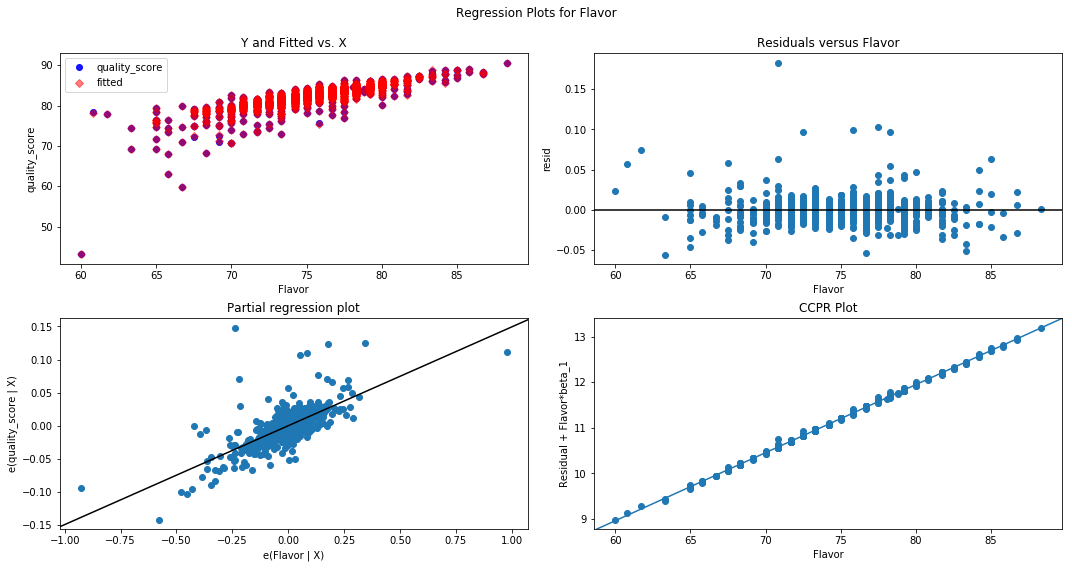

In [1216]:
# plotting model with Flavor
fig1 = plt.figure(figsize=(15,8))
fig1 = sm.graphics.plot_regress_exog(dummy_model1, "Flavor", fig=fig1)
plt.show()

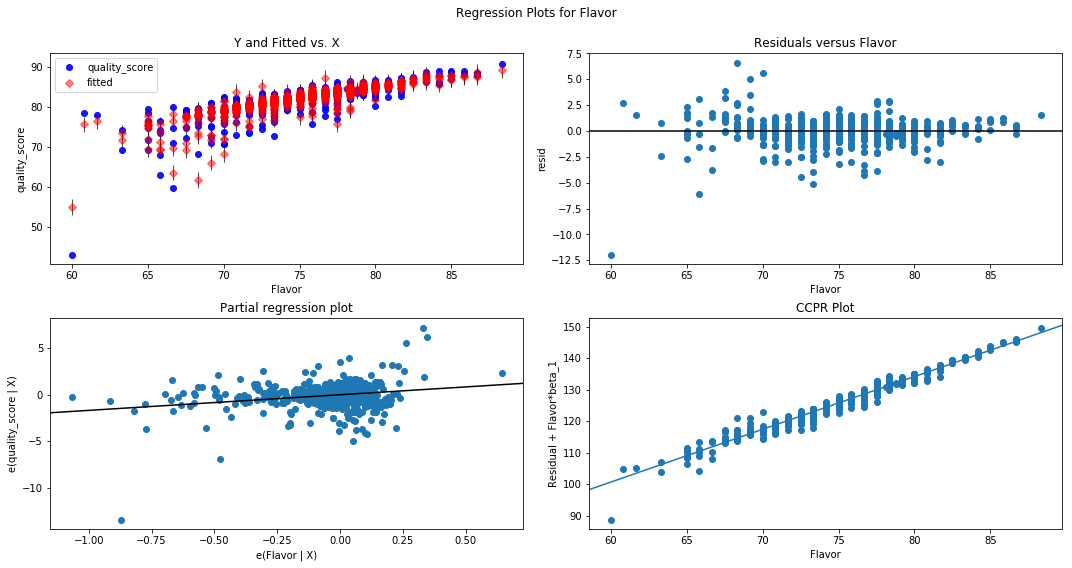

In [1219]:
# plotting model with Flavor
fig2 = plt.figure(figsize=(15,8))
fig2 = sm.graphics.plot_regress_exog(dummy_model2, "Flavor", fig=fig2)
plt.show()

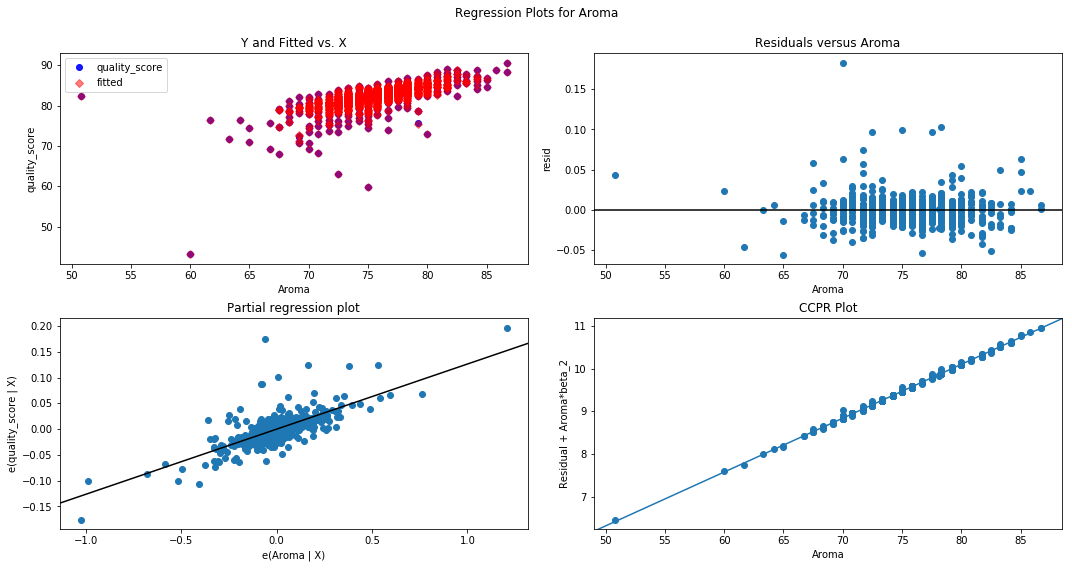

In [1217]:
# plotting model with Aroma
fig2 = plt.figure(figsize=(15,8))
fig2 = sm.graphics.plot_regress_exog(dummy_model1, "Aroma", fig=fig2)
plt.show()

In [1220]:
# residuals of 1st model
resid1 = dummy_model1.resid

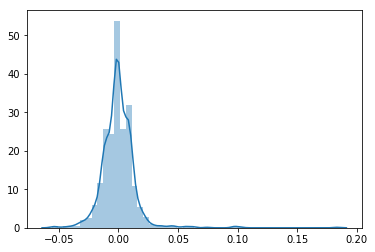

In [1221]:
# histogram of residuals of 1st model
sns.distplot(resid1)

In [1222]:
# residuals of 2nd model
resid2 = dummy_model2.resid

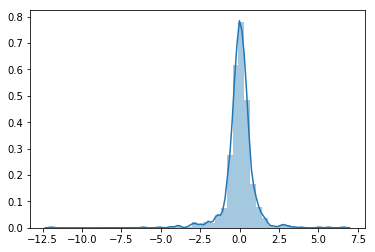

In [1223]:
# histogram of residuals of 2nd model
sns.distplot(resid2)